## **Importing the libraries and data**
In this section, we import all required Python libraries and load the dataset into a pandas DataFrame for further exploration.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [7]:
data = pd.read_csv('/content/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can observe that we do not have the problem of null values and wrong datatypes which allows us to continue our project.

In [9]:
data.shape

(4600, 18)

## **Exploratory Data Analysis**

In this section, we explore the distribution of each variable, detect possible outliers, and investigate relationships between features and the target variable (Price).


In [10]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### **Dealing with date column**

In [11]:
data["date"] = data["date"].astype("datetime64[ns]")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [13]:
data["date"].dt.year.unique()

array([2014], dtype=int32)

As we can observe all sales of house occurred in 2014 which means this information is not important for our model.

In [14]:
data["date"].dt.month.unique()

array([5, 6, 7], dtype=int32)

As we can observe the months all sales occurr is June July and August which might be important for our model.

In [15]:
data["date"].dt.weekday.unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int32)

As we can observe the sales occurr throught the week and this indformation could be also important for us.

In [16]:
data["date_month"]= pd.DataFrame(data["date"].dt.month)
data["date_weekday"]= pd.DataFrame(data["date"].dt.weekday)
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,date_month,date_weekday
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5,4
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5,4


After creating the months and weekdays column I decided to drop the initial date column as it will not be an important information for our model.

In [17]:
data = data.drop(["date"], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5,4


### **Dealing with string columns**

In [18]:
data = data.drop(['street'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA,5,4


I think that the street column is not important for our model.

In [19]:
data = data.drop(["statezip"], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,5,4


Statezip column is not important also

In [20]:
data["country"].value_counts()

,count
country,
USA,4600


As we can see all sales occurred at USA that lead us to its drop as it will not affect to our model.

In [21]:
data=data.drop(["country"],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,5,4


In [22]:
data["city"].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


The city columns will stay at our table as this parametr could affect the house price.

In [23]:
df=data["city"].value_counts()
filter = data["city"].isin(df[df>40].index.tolist())
data= data[filter]

I have dropped all the cities which occurred less than 40 times as it might cause some noise for our model.

In [24]:
data["city"].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


### **Data visualization**

**Distribution**

In [25]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,5,4


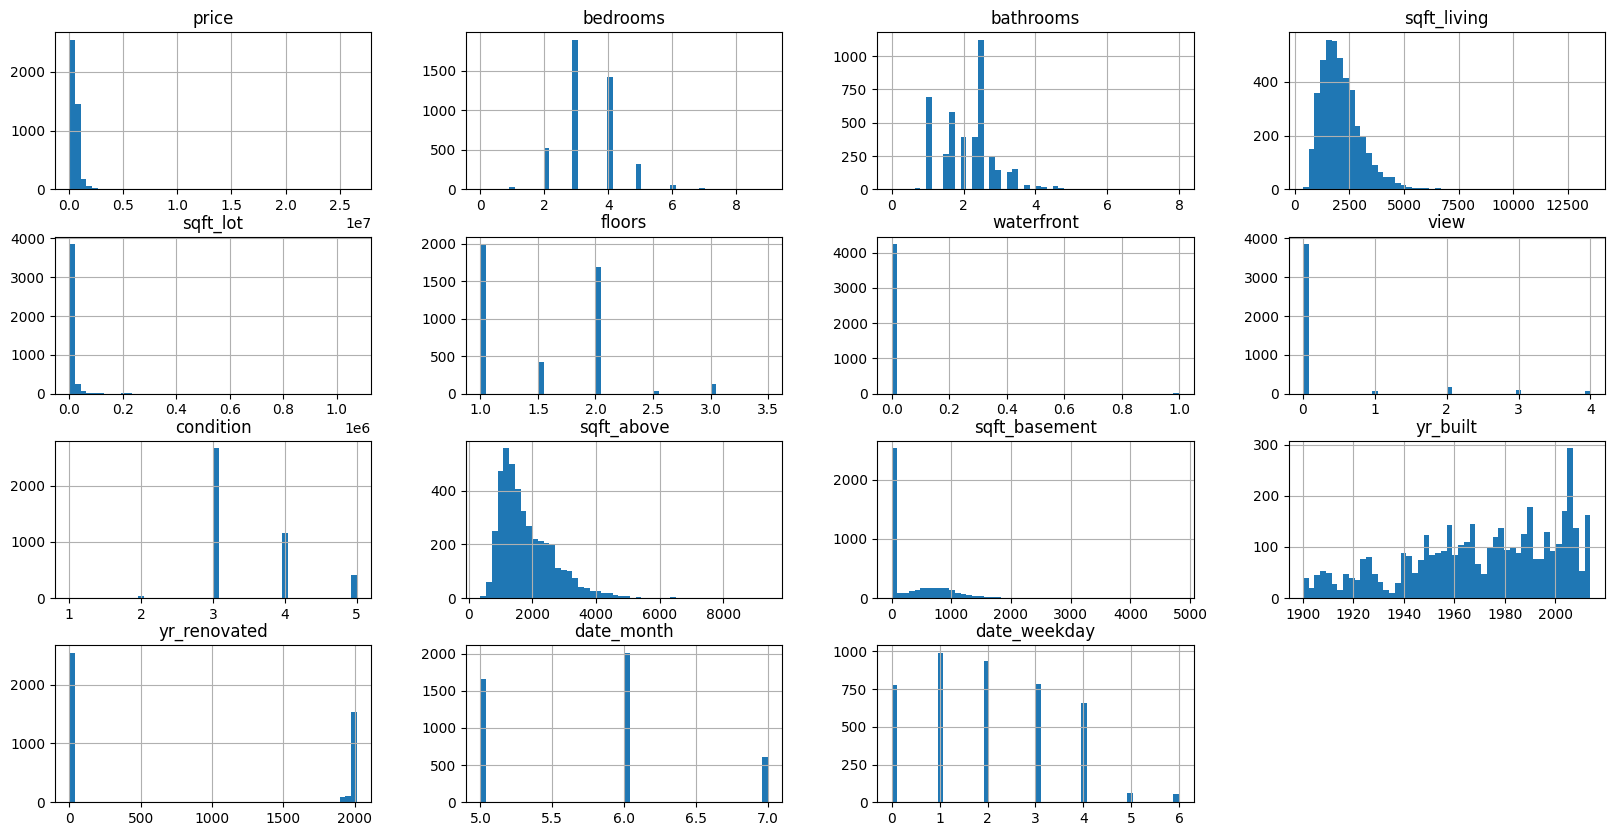

In [26]:
data.hist(bins=50,figsize=(20,10))
plt.show()

- The `price` distribution is strongly right-skewed.
- Numerical features like `sqft_living`, `sqft_lot`, `sqft_above`, and `sqft_basement` also show strong right skewness.
- `bedrooms`, `bathrooms`, and `floors` are clustered around common residential values (3–4 bedrooms, 2–3 bathrooms, 1–2 floors).
- Most houses have a `condition` rating of 3 or 4, and very few have condition 1 or 5.
- The `waterfront` and `view` features are highly imbalanced — almost all houses have no waterfront and minimal view.
- `yr_built` shows a steady increase in housing stock over time, with a peak in recent decades.
- `yr_renovated` is zero for most houses, with some renovations clustered around the 1990s–2000s.
- Sales occurred mostly in months 5–7 (May–July), and are well distributed across weekdays.


In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,date_month,date_weekday
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,5,4
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,5,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,5,4
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,5,4
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,5,4


**Correlation**

In [28]:
data_num = data.drop("city", axis=1)
data_num.corrwith(data_num["price"]).sort_values(ascending=False)

,0
price,1.000000
sqft_living,0.412858
sqft_above,0.353059
bathrooms,0.315378
view,0.236299
sqft_basement,0.202782
bedrooms,0.192611
waterfront,0.155072
floors,0.147422
sqft_lot,0.052645


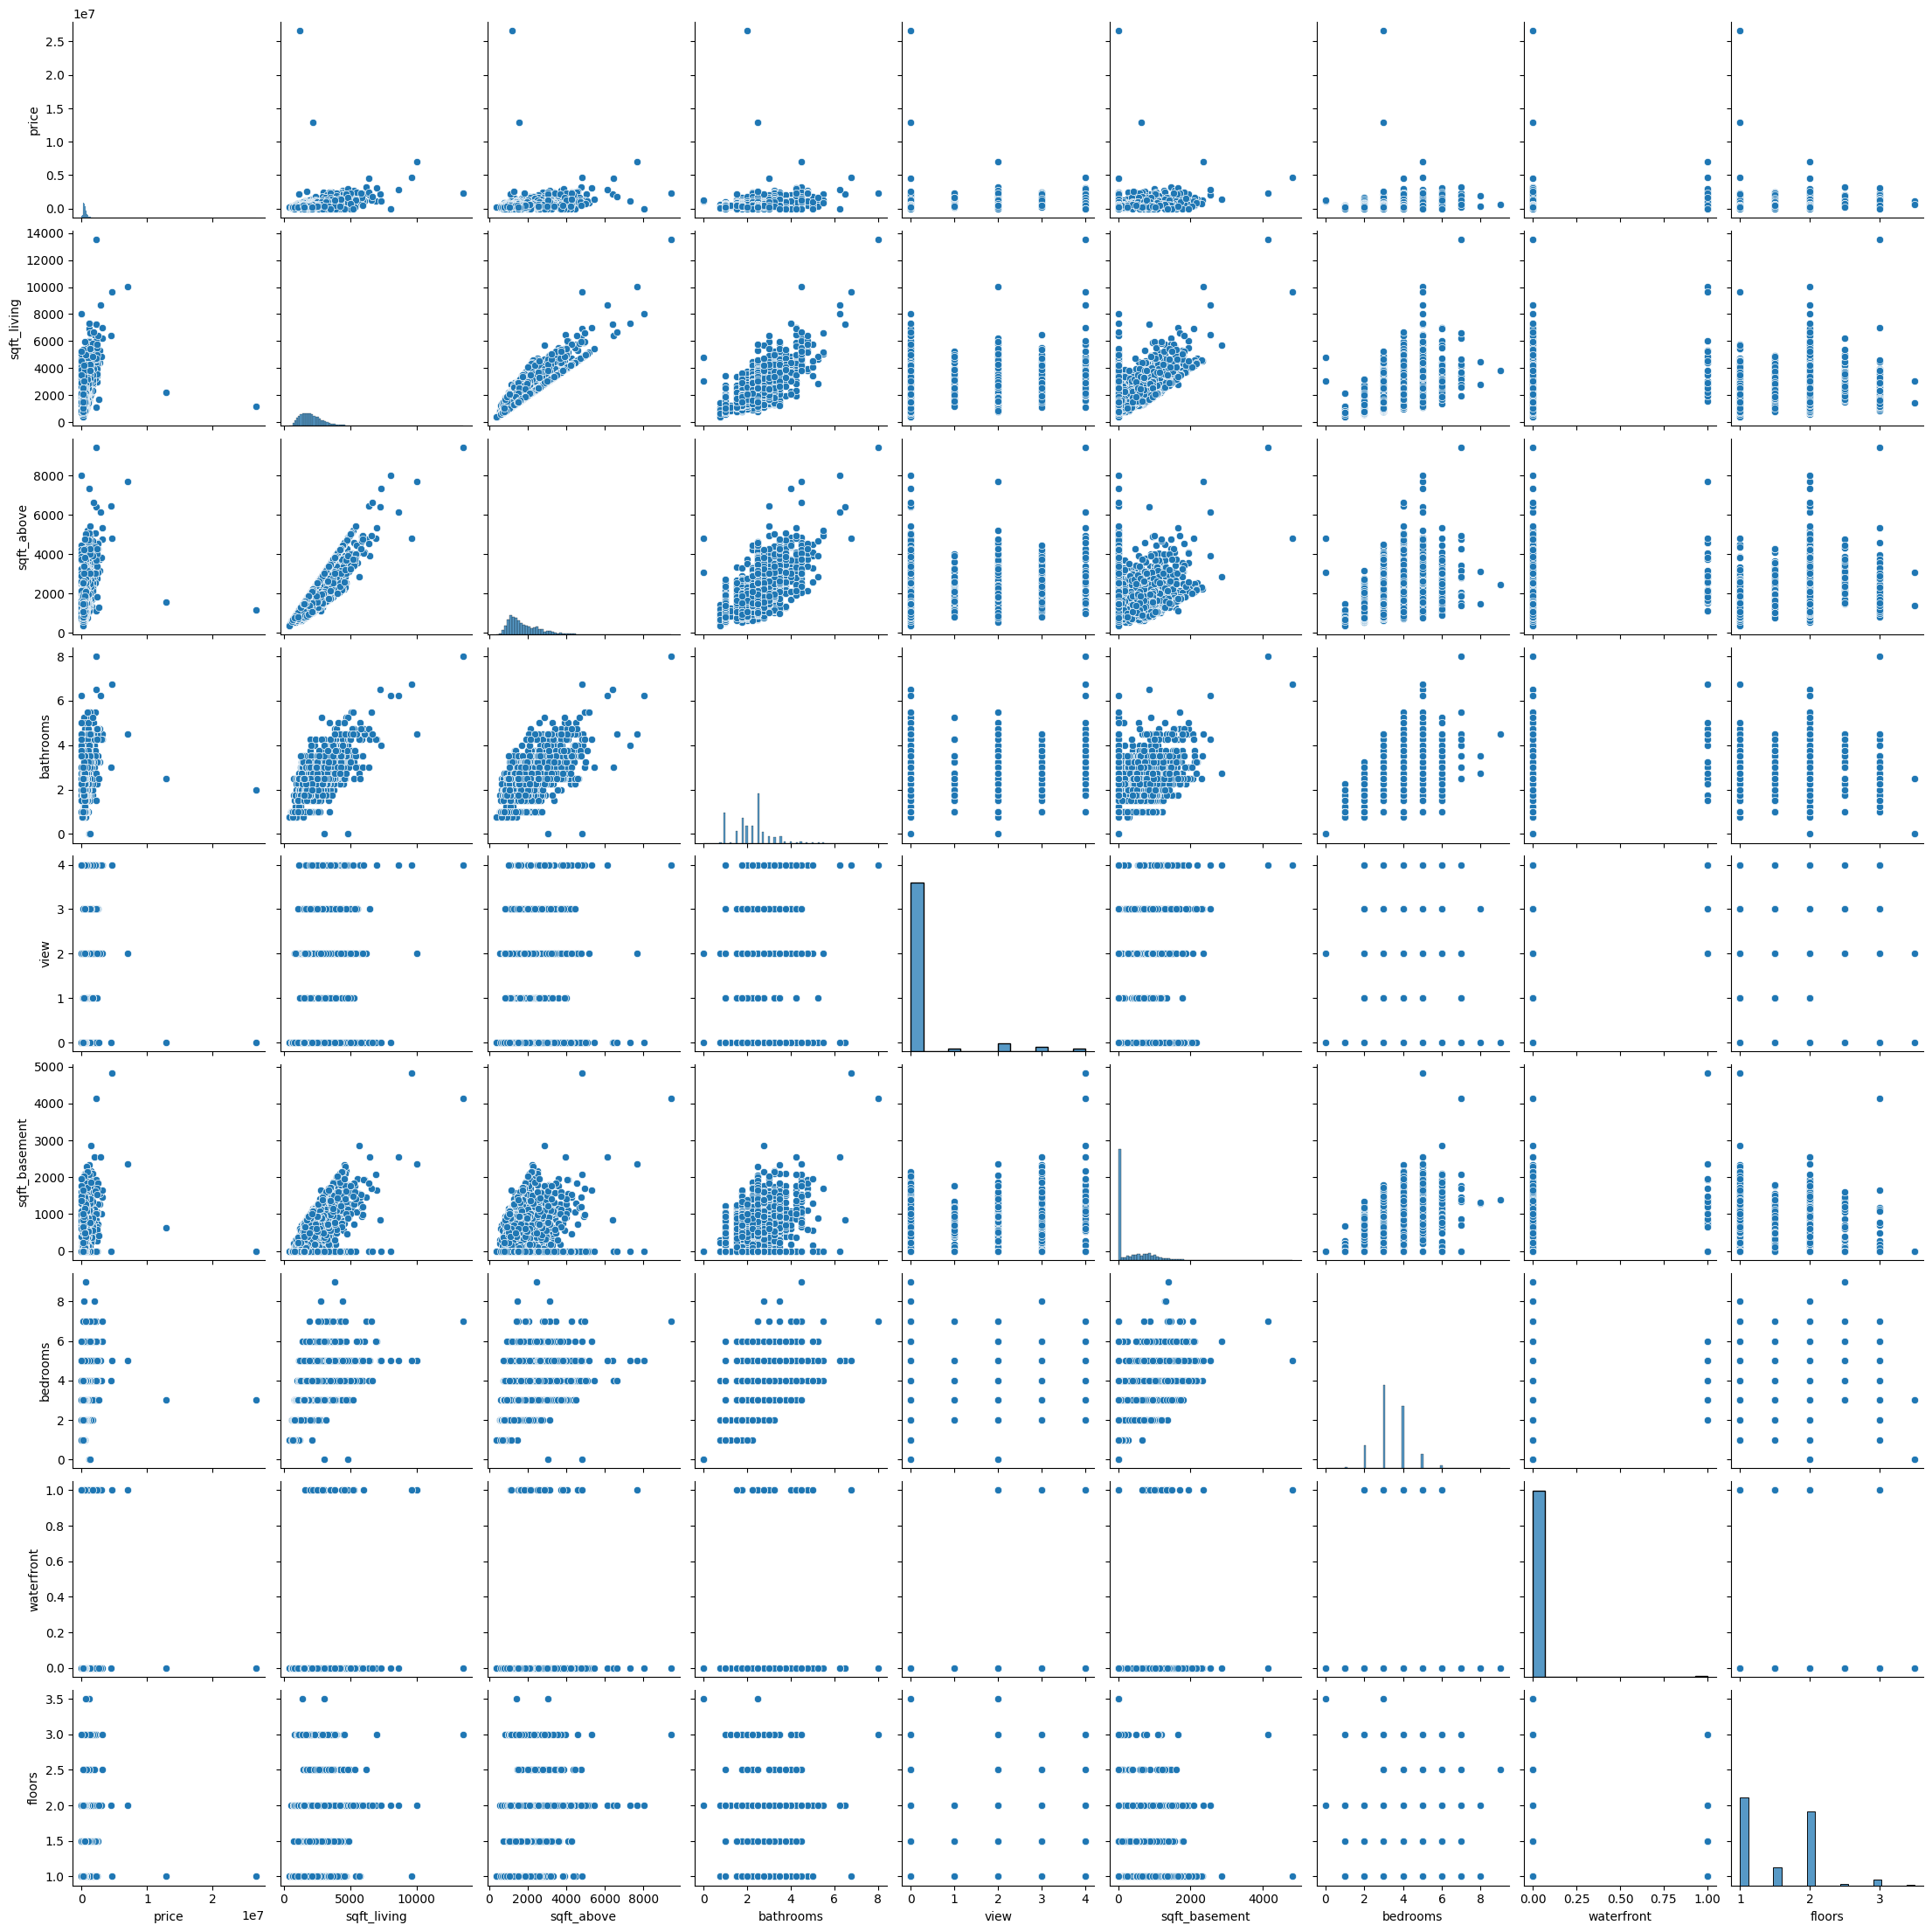

In [29]:
cols = ["price", "sqft_living", "sqft_above","bathrooms", "view", "sqft_basement", "bedrooms", "waterfront", "floors"]
sns.pairplot(data_num[cols])
plt.show()

I have selected 9 most correlated columns(numeric) to our label and drawn their scatterplots as we can observe int the graph above.

Therefore, I would use only `price`, `sqft_living`, `sqft_above`, `bathrooms`, `view`, `sqft_basement`, `bedrooms`, `waterfront`, `floors`, `city`   columns in our model

In [30]:
data = data[["price", "sqft_living", "sqft_above","bathrooms", "view", "sqft_basement", "bedrooms", "waterfront", "floors", "city"]]

## **Preparing the data for Machine Learning**

In [31]:
data.head()

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,city
0,313000.0,1340,1340,1.50,0,0,3.0,0,1.5,Shoreline
1,2384000.0,3650,3370,2.50,4,280,5.0,0,2.0,Seattle
2,342000.0,1930,1930,2.00,0,0,3.0,0,1.0,Kent
3,420000.0,2000,1000,2.25,0,1000,3.0,0,1.0,Bellevue
4,550000.0,1940,1140,2.50,0,800,4.0,0,1.0,Redmond


**Encoding the city column**

In [32]:
data["city"].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


I have diceded to use Target Encoding as I have lots range of cities.

In [33]:
mean_target = data.groupby('city')['price'].mean()
data['city_encoded'] = data['city'].map(mean_target)

In [34]:
data.head()

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,city,city_encoded
0,313000.0,1340,1340,1.50,0,0,3.0,0,1.5,Shoreline,420392.364047
1,2384000.0,3650,3370,2.50,4,280,5.0,0,2.0,Seattle,579837.467282
2,342000.0,1930,1930,2.00,0,0,3.0,0,1.0,Kent,439492.444648
3,420000.0,2000,1000,2.25,0,1000,3.0,0,1.0,Bellevue,847180.662995
4,550000.0,1940,1140,2.50,0,800,4.0,0,1.0,Redmond,667649.534781


In [35]:
data_num= data.drop("city", axis=1)
data_num.corrwith(data_num["price"]).sort_values(ascending=False)

,0
price,1.000000
sqft_living,0.412858
sqft_above,0.353059
bathrooms,0.315378
city_encoded,0.288023
view,0.236299
sqft_basement,0.202782
bedrooms,0.192611
waterfront,0.155072
floors,0.147422


As we can see above we have high correlation with our encoded column which means that we can drop string column.

In [36]:
data = data.drop("city", axis=1)
data.head()

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,city_encoded
0,313000.0,1340,1340,1.50,0,0,3.0,0,1.5,420392.364047
1,2384000.0,3650,3370,2.50,4,280,5.0,0,2.0,579837.467282
2,342000.0,1930,1930,2.00,0,0,3.0,0,1.0,439492.444648
3,420000.0,2000,1000,2.25,0,1000,3.0,0,1.0,847180.662995
4,550000.0,1940,1140,2.50,0,800,4.0,0,1.0,667649.534781


**Working with multicollinearity**

In [37]:
data.corr()

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,waterfront,floors,city_encoded
price,1.000000,0.412858,0.353059,0.315378,0.236299,0.202782,0.192611,0.155072,0.147422,0.288023
sqft_living,0.412858,1.000000,0.875637,0.757292,0.328353,0.453375,0.598021,0.151066,0.342242,0.234879
sqft_above,0.353059,0.875637,1.000000,0.686809,0.186329,-0.033489,0.488818,0.104659,0.520828,0.170796
bathrooms,0.315378,0.757292,0.686809,1.000000,0.225624,0.299605,0.543306,0.104629,0.490628,0.170862
view,0.236299,0.328353,0.186329,0.225624,1.000000,0.335612,0.128617,0.336534,0.039197,0.094769
sqft_basement,0.202782,0.453375,-0.033489,0.299605,0.335612,1.000000,0.335408,0.119462,-0.252965,0.170844
bedrooms,0.192611,0.598021,0.488818,0.543306,0.128617,0.335408,1.000000,0.023582,0.177109,0.102981
waterfront,0.155072,0.151066,0.104659,0.104629,0.336534,0.119462,0.023582,1.000000,0.031145,0.051652
floors,0.147422,0.342242,0.520828,0.490628,0.039197,-0.252965,0.177109,0.031145,1.000000,0.063323
city_encoded,0.288023,0.234879,0.170796,0.170862,0.094769,0.170844,0.102981,0.051652,0.063323,1.000000


In [38]:
data= data.drop("sqft_above", axis=1)
data=data.drop("bedrooms", axis=1)
data.corr()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,city_encoded
price,1.000000,0.412858,0.315378,0.236299,0.202782,0.155072,0.147422,0.288023
sqft_living,0.412858,1.000000,0.757292,0.328353,0.453375,0.151066,0.342242,0.234879
bathrooms,0.315378,0.757292,1.000000,0.225624,0.299605,0.104629,0.490628,0.170862
view,0.236299,0.328353,0.225624,1.000000,0.335612,0.336534,0.039197,0.094769
sqft_basement,0.202782,0.453375,0.299605,0.335612,1.000000,0.119462,-0.252965,0.170844
waterfront,0.155072,0.151066,0.104629,0.336534,0.119462,1.000000,0.031145,0.051652
floors,0.147422,0.342242,0.490628,0.039197,-0.252965,0.031145,1.000000,0.063323
city_encoded,0.288023,0.234879,0.170862,0.094769,0.170844,0.051652,0.063323,1.000000


**Train and test split**

In [39]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,city_encoded
1792,875000.0,3720,2.25,2,1860,0,1.0,686917.583532
1245,535000.0,2210,2.50,0,0,0,2.0,667649.534781
200,762300.0,3880,2.50,0,0,0,2.0,686917.583532
972,200000.0,1050,1.00,0,0,0,1.0,377040.966329
607,560000.0,1440,1.00,0,0,0,2.0,579837.467282


In [40]:
test_set.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,city_encoded
1824,930000.0,2680,2.50,0,0,0,1.0,667649.534781
1254,433000.0,1830,1.75,0,820,0,1.0,847180.662995
328,205000.0,720,1.00,0,0,0,1.0,579837.467282
1410,760000.0,3330,2.50,0,0,0,2.0,667649.534781
3522,257500.0,1715,2.25,0,0,0,2.0,289887.703990


**Spliting the label(y) and parametrs(x)**

In [41]:
x_train = train_set.drop("price", axis=1)
y_train = train_set["price"].copy()
x_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

**Standartization of th values**

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
x_train

array([[ 1.64567589,  0.10944604,  2.29485502, ..., -0.07279281,
        -0.96399932,  0.81805449],
       [ 0.07903752,  0.4286247 , -0.30273527, ..., -0.07279281,
         0.88339556,  0.69971388],
       [ 1.8116773 ,  0.4286247 , -0.30273527, ..., -0.07279281,
         0.88339556,  0.81805449],
       ...,
       [-0.36709129, -0.20973263, -0.30273527, ..., -0.07279281,
        -0.04030188,  0.16038922],
       [-0.58496815, -0.5289113 , -0.30273527, ..., -0.07279281,
         0.88339556, -0.94680492],
       [-1.48760086, -1.4864473 , -0.30273527, ..., -0.07279281,
        -0.96399932,  0.16038922]])

## **Training the model**

## **Linear model**

In [45]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

**Predicting with the test_set**

In [47]:
y_predicted= LR_model.predict(x_test)

array([ 718021.7961823 ,  664549.16757789,  280722.3594541 ,
        845112.0467825 ,  289747.49863078,  588229.57774763,
        611125.71552826,  532799.6273224 ,  747682.63267131,
        325529.47937943,  481681.53073797,  746159.55100878,
        388269.58041938,  417231.1382154 ,  910427.419267  ,
        494026.32803291,  435604.82781052,  413312.01226801,
        916852.67071754,  815084.79076015,  468950.55602107,
        433741.56493377,  531247.34535493,  393022.66564037,
        727457.15472368,  848696.61637652,  309142.80523318,
        611138.16997943,  509012.43910447,  356878.54057889,
        341968.67579428,  622401.46337489,  749279.1915707 ,
        639711.75706854,  904822.40920224,  587855.57796969,
        791863.30827455, 1191818.2730618 ,  445062.35267376,
        492137.03023895,  439015.28196813,  580628.33538425,
        142285.10824238,  338075.47295852, 1177948.86214262,
        578719.98596025,  698287.43565684,  298751.83503774,
        428674.55242487,

### **Evaluating the LR_model**

MAE(mean absolute error)

In [49]:
mae = mean_absolute_error(y_test, y_predicted)
mae

139828.23249456836

RMSE(root mean squared error)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
rmse

np.float64(252765.9635002037)

Cross Validation

In [52]:
data.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,city_encoded
0,313000.0,1340,1.50,0,0,0,1.5,420392.364047
1,2384000.0,3650,2.50,4,280,0,2.0,579837.467282
2,342000.0,1930,2.00,0,0,0,1.0,439492.444648
3,420000.0,2000,2.25,0,1000,0,1.0,847180.662995
4,550000.0,1940,2.50,0,800,0,1.0,667649.534781


In [55]:
x_data = data.drop("price", axis=1)

In [56]:
y_data = data["price"].copy()

In [58]:
scores = cross_val_score(LR_model, x_data, y_data, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [59]:
LR_rmse_scores

array([ 205240.43681396,  153109.75542158,  199246.92490978,
        188260.0264024 ,  279417.29181717,  211218.26695808,
        239351.63521164,  183829.90218343,  212760.61107819,
       1468885.54643313])

We can observe the evaluaion of the Linear Model we have trained and for now I want to try some more algorithm to increase the quality of preidction.

## **Random Forest**

In [62]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
y_rf_predict = RF_model.predict(x_test)

### **Evaluating the RF_model**

MAE(mean absolute error)

In [66]:
mae = mean_absolute_error(y_test, y_rf_predict)
mae

137865.0755997022

RMSE(root mean squared error)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_rf_predict))
rmse

np.float64(268682.62527236174)

Cross Validation

In [69]:
scores = cross_val_score(RF_model, x_data, y_data, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)

In [70]:
RF_rmse_scores

array([ 249232.11968347,  656994.14965918,  221085.49586159,
        194369.96547986,  300991.37419933,  205299.30053425,
        276403.26964551,  216578.41574181,  468900.94758208,
       1467814.849423  ])

We can compare two models and analyze that for our data the most appropriate model would be LR_model.

## **Training without city_encoded column**

In [71]:
data.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors,city_encoded
0,313000.0,1340,1.50,0,0,0,1.5,420392.364047
1,2384000.0,3650,2.50,4,280,0,2.0,579837.467282
2,342000.0,1930,2.00,0,0,0,1.0,439492.444648
3,420000.0,2000,2.25,0,1000,0,1.0,847180.662995
4,550000.0,1940,2.50,0,800,0,1.0,667649.534781


In [72]:
data1= data.drop("city_encoded", axis=1)
data1.head()

,price,sqft_living,bathrooms,view,sqft_basement,waterfront,floors
0,313000.0,1340,1.50,0,0,0,1.5
1,2384000.0,3650,2.50,4,280,0,2.0
2,342000.0,1930,2.00,0,0,0,1.0
3,420000.0,2000,2.25,0,1000,0,1.0
4,550000.0,1940,2.50,0,800,0,1.0


In [73]:
train_set, test_set = train_test_split(data1, test_size=0.2, random_state=42)

In [74]:
x_train = train_set.drop("price", axis=1)
y_train = train_set["price"].copy()
x_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

## **Training the Linear Regression Model**

In [75]:
LR_model_2 = LinearRegression()
LR_model_2.fit(x_train, y_train)

LinearRegression()

In [76]:
y_predicted_2=LR_model_2.predict(x_test)

## **Evaluating**

In [77]:
mae_2 = mean_absolute_error(y_test, y_predicted_2)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted_2))
cross_val_score_2=cross_val_score(LR_model_2, x_data, y_data, scoring="neg_mean_squared_error", cv=10)
print("MAE: ", mae_2)
print("RMSE: ", rmse)
print("Cross Validation: ", cross_val_score_2)

MAE:  174890.09981338482
RMSE:  278578.7947774893
Cross Validation:  [-4.21236369e+10 -2.34425972e+10 -3.96993371e+10 -3.54418375e+10
 -7.80740230e+10 -4.46131563e+10 -5.72892053e+10 -3.37934329e+10
 -4.52670776e+10 -2.15762475e+12]


I thought dropping the city_encoded column would improve the quality of predictor but it did not improve.